# Homework 4 Assignment 2

Formulate a hypothesis involving categorical data, clean the data. Display the top few rows of data, display reduced dataframe and plot data distributions.

In [31]:
#As per coding convention, all imported items will be shown at the first line

#to ensure compatibility
from __future__  import print_function, division

#importing relevant packages
import pylab as pl
import pandas as pd
import numpy as np
import os
import datetime # for datawrangling

%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [32]:
# setting puidata, despite my bash being set up correctly 
os.environ["PUIDATA"] = "%s/001_PUI/PUIDATA"%os.getenv("HOME")
print("Path to PUIDATA", os.getenv("PUIDATA"))

Path to PUIDATA /nfshome/qg412/001_PUI/PUIDATA


In [33]:
# From homework 4 example, downloading the data
def getCitiBikeCSV(datestring):
    print ("Downloading", datestring)
    ### checking if it is already there
    if not os.path.isfile(os.getenv("PUIDATA") + "/" + datestring + "-citibike-tripdata.csv"):
        if os.path.isfile(datestring + "-citibike-tripdata.csv"):
            # if in the current dir just move it
            if os.system("mv " + datestring + "-citibike-tripdata.csv " + os.getenv("PUIDATA")):
                print ("Error moving file!, Please check!")
        #otherwise start looking for the zip file
        else:
            if not os.path.isfile(os.getenv("PUIDATA") + "/" + datestring + "-citibike-tripdata.zip"):
                if not os.path.isfile(datestring + "-citibike-tripdata.zip"):
                    os.system("curl -O https://s3.amazonaws.com/tripdata/" + datestring + "-citibike-tripdata.zip")
                ###  To move it, use the os.system() functions to run bash commands with arguments
                os.system("mv " + datestring + "-citibike-tripdata.zip " + os.getenv("PUIDATA"))
            ### unzip the csv 
            os.system("unzip " + os.getenv("PUIDATA") + "/" + datestring + "-citibike-tripdata.zip")
            ## NOTE: old csv citibike data had a different name structure. 
            if '2014' in datestring:
                os.system("mv " + datestring[:4] + '-' +  datestring[4:] + 
                          "\ -\ Citi\ Bike\ trip\ data.csv " + datestring + "-citibike-tripdata.csv")
            os.system("mv " + datestring + "-citibike-tripdata.csv " + os.getenv("PUIDATA"))
    ### One final check:
    if not os.path.isfile(os.getenv("PUIDATA") + "/" + datestring + "-citibike-tripdata.csv"):
        print ("WARNING!!! something is wrong: the file is not there!")

    else:
        print ("file in place, you can continue")

In [36]:
months = ['201602','201605','201608', '201611']
for x in months: 
   getCitiBikeCSV(x)

file in place, you can continue
file in place, you can continue
file in place, you can continue
file in place, you can continue


In [35]:
cbdf = {}
for x in months:
   cbdf[x] = pd.read_csv("%s/%s-citibike-tripdata.csv" % (os.getenv("PUIDATA"), x))

In [38]:
cbdf['201602'].head()

,tripduration,starttime,stoptime,start station id,start station name,start station latitude,start station longitude,end station id,end station name,end station latitude,end station longitude,bikeid,usertype,birth year,gender
0,461,2/1/2016 00:00:08,2/1/2016 00:07:49,480,W 53 St & 10 Ave,40.766697,-73.990617,524,W 43 St & 6 Ave,40.755273,-73.983169,23292,Subscriber,1966.0,1
1,297,2/1/2016 00:00:56,2/1/2016 00:05:53,463,9 Ave & W 16 St,40.742065,-74.004432,380,W 4 St & 7 Ave S,40.734011,-74.002939,15329,Subscriber,1977.0,1
2,280,2/1/2016 00:01:00,2/1/2016 00:05:40,3134,3 Ave & E 62 St,40.763126,-73.965269,3141,1 Ave & E 68 St,40.765005,-73.958185,22927,Subscriber,1987.0,1
3,662,2/1/2016 00:01:00,2/1/2016 00:12:02,537,Lexington Ave & E 24 St,40.740259,-73.984092,428,E 3 St & 1 Ave,40.724677,-73.987834,20903,Subscriber,1983.0,2
4,355,2/1/2016 00:01:41,2/1/2016 00:07:36,284,Greenwich Ave & 8 Ave,40.739017,-74.002638,521,8 Ave & W 31 St,40.750967,-73.994442,23228,Subscriber,1978.0,1


In [30]:
for key, value in cbdf.items():
   print (key)
   print (value.columns)

201603
Index(['tripduration', 'starttime', 'stoptime', 'start station id',
       'start station name', 'start station latitude',
       'start station longitude', 'end station id', 'end station name',
       'end station latitude', 'end station longitude', 'bikeid', 'usertype',
       'birth year', 'gender'],
      dtype='object')
201605
Index(['tripduration', 'starttime', 'stoptime', 'start station id',
       'start station name', 'start station latitude',
       'start station longitude', 'end station id', 'end station name',
       'end station latitude', 'end station longitude', 'bikeid', 'usertype',
       'birth year', 'gender'],
      dtype='object')
201608
Index(['tripduration', 'starttime', 'stoptime', 'start station id',
       'start station name', 'start station latitude',
       'start station longitude', 'end station id', 'end station name',
       'end station latitude', 'end station longitude', 'bikeid', 'usertype',
       'birth year', 'gender'],
      dtype='object'

In [37]:
cbdf['201611'].columns = cbdf['201602'].columns

In [51]:
cdf = pd.concat(cbdf.values())
cdf

,tripduration,starttime,stoptime,start station id,start station name,start station latitude,start station longitude,end station id,end station name,end station latitude,end station longitude,bikeid,usertype,birth year,gender
0,538,5/1/2016 00:00:03,5/1/2016 00:09:02,536,1 Ave & E 30 St,40.741444,-73.975361,497,E 17 St & Broadway,40.737050,-73.990093,23097,Subscriber,1986.0,2
1,224,5/1/2016 00:00:04,5/1/2016 00:03:49,361,Allen St & Hester St,40.716059,-73.991908,340,Madison St & Clinton St,40.712690,-73.987763,23631,Subscriber,1977.0,1
2,328,5/1/2016 00:00:14,5/1/2016 00:05:43,301,E 2 St & Avenue B,40.722174,-73.983688,311,Norfolk St & Broome St,40.717227,-73.988021,23049,Subscriber,1980.0,1
3,1196,5/1/2016 00:00:20,5/1/2016 00:20:17,3141,1 Ave & E 68 St,40.765005,-73.958185,237,E 11 St & 2 Ave,40.730473,-73.986724,19019,Customer,NaN,0
4,753,5/1/2016 00:00:26,5/1/2016 00:13:00,492,W 33 St & 7 Ave,40.750200,-73.990931,228,E 48 St & 3 Ave,40.754601,-73.971879,16437,Subscriber,1981.0,1
5,511,5/1/2016 00:00:33,5/1/2016 00:09:05,445,E 10 St & Avenue A,40.727408,-73.981420,537,Lexington Ave & E 24 St,40.740259,-73.984092,20592,Subscriber,1991.0,1
6,362,5/1/2016 00:00:34,5/1/2016 00:06:37,151,Cleveland Pl & Spring St,40.722104,-73.997249,229,Great Jones St,40.727434,-73.993790,15681,Subscriber,1986.0,1
7,1399,5/1/2016 00:00:37,5/1/2016 00:23:56,161,LaGuardia Pl & W 3 St,40.729170,-73.998102,2022,E 60 St & York Ave,40.759107,-73.959223,16003,Subscriber,1989.0,1
8,515,5/1/2016 00:00:42,5/1/2016 00:09:17,368,Carmine St & 6 Ave,40.730386,-74.002150,334,W 20 St & 7 Ave,40.742388,-73.997262,20515,Subscriber,1998.0,1
9,1477,5/1/2016 00:00:50,5/1/2016 00:25:27,459,W 20 St & 11 Ave,40.746745,-74.007756,445,E 10 St & Avenue A,40.727408,-73.981420,20884,Subscriber,1995.0,1


In [53]:
cdf.reset_index(drop=True, inplace=True)
cdf.head()

,tripduration,starttime,stoptime,start station id,start station name,start station latitude,start station longitude,end station id,end station name,end station latitude,end station longitude,bikeid,usertype,birth year,gender
0,538,5/1/2016 00:00:03,5/1/2016 00:09:02,536,1 Ave & E 30 St,40.741444,-73.975361,497,E 17 St & Broadway,40.737050,-73.990093,23097,Subscriber,1986.0,2
1,224,5/1/2016 00:00:04,5/1/2016 00:03:49,361,Allen St & Hester St,40.716059,-73.991908,340,Madison St & Clinton St,40.712690,-73.987763,23631,Subscriber,1977.0,1
2,328,5/1/2016 00:00:14,5/1/2016 00:05:43,301,E 2 St & Avenue B,40.722174,-73.983688,311,Norfolk St & Broome St,40.717227,-73.988021,23049,Subscriber,1980.0,1
3,1196,5/1/2016 00:00:20,5/1/2016 00:20:17,3141,1 Ave & E 68 St,40.765005,-73.958185,237,E 11 St & 2 Ave,40.730473,-73.986724,19019,Customer,NaN,0
4,753,5/1/2016 00:00:26,5/1/2016 00:13:00,492,W 33 St & 7 Ave,40.750200,-73.990931,228,E 48 St & 3 Ave,40.754601,-73.971879,16437,Subscriber,1981.0,1


In [55]:
cdf['date'] = pd.to_datetime(cdf['starttime']) 
cdf.head()

,tripduration,starttime,stoptime,start station id,start station name,start station latitude,start station longitude,end station id,end station name,end station latitude,end station longitude,bikeid,usertype,birth year,gender,date
0,538,5/1/2016 00:00:03,5/1/2016 00:09:02,536,1 Ave & E 30 St,40.741444,-73.975361,497,E 17 St & Broadway,40.737050,-73.990093,23097,Subscriber,1986.0,2,2016-05-01 00:00:03
1,224,5/1/2016 00:00:04,5/1/2016 00:03:49,361,Allen St & Hester St,40.716059,-73.991908,340,Madison St & Clinton St,40.712690,-73.987763,23631,Subscriber,1977.0,1,2016-05-01 00:00:04
2,328,5/1/2016 00:00:14,5/1/2016 00:05:43,301,E 2 St & Avenue B,40.722174,-73.983688,311,Norfolk St & Broome St,40.717227,-73.988021,23049,Subscriber,1980.0,1,2016-05-01 00:00:14
3,1196,5/1/2016 00:00:20,5/1/2016 00:20:17,3141,1 Ave & E 68 St,40.765005,-73.958185,237,E 11 St & 2 Ave,40.730473,-73.986724,19019,Customer,NaN,0,2016-05-01 00:00:20
4,753,5/1/2016 00:00:26,5/1/2016 00:13:00,492,W 33 St & 7 Ave,40.750200,-73.990931,228,E 48 St & 3 Ave,40.754601,-73.971879,16437,Subscriber,1981.0,1,2016-05-01 00:00:26


In [57]:
cdf['weekdaynum'] = cdf['date'].apply(lambda x: x.weekday())
cdf.head()

,tripduration,starttime,stoptime,start station id,start station name,start station latitude,start station longitude,end station id,end station name,end station latitude,end station longitude,bikeid,usertype,birth year,gender,date,weekdaynum
0,538,5/1/2016 00:00:03,5/1/2016 00:09:02,536,1 Ave & E 30 St,40.741444,-73.975361,497,E 17 St & Broadway,40.737050,-73.990093,23097,Subscriber,1986.0,2,2016-05-01 00:00:03,6
1,224,5/1/2016 00:00:04,5/1/2016 00:03:49,361,Allen St & Hester St,40.716059,-73.991908,340,Madison St & Clinton St,40.712690,-73.987763,23631,Subscriber,1977.0,1,2016-05-01 00:00:04,6
2,328,5/1/2016 00:00:14,5/1/2016 00:05:43,301,E 2 St & Avenue B,40.722174,-73.983688,311,Norfolk St & Broome St,40.717227,-73.988021,23049,Subscriber,1980.0,1,2016-05-01 00:00:14,6
3,1196,5/1/2016 00:00:20,5/1/2016 00:20:17,3141,1 Ave & E 68 St,40.765005,-73.958185,237,E 11 St & 2 Ave,40.730473,-73.986724,19019,Customer,NaN,0,2016-05-01 00:00:20,6
4,753,5/1/2016 00:00:26,5/1/2016 00:13:00,492,W 33 St & 7 Ave,40.750200,-73.990931,228,E 48 St & 3 Ave,40.754601,-73.971879,16437,Subscriber,1981.0,1,2016-05-01 00:00:26,6


In [58]:
cdf['date_only'] = cdf['date'].apply(lambda x: x.date())
cdf.head()

,tripduration,starttime,stoptime,start station id,start station name,start station latitude,start station longitude,end station id,end station name,end station latitude,end station longitude,bikeid,usertype,birth year,gender,date,weekdaynum,date_only
0,538,5/1/2016 00:00:03,5/1/2016 00:09:02,536,1 Ave & E 30 St,40.741444,-73.975361,497,E 17 St & Broadway,40.737050,-73.990093,23097,Subscriber,1986.0,2,2016-05-01 00:00:03,6,2016-05-01
1,224,5/1/2016 00:00:04,5/1/2016 00:03:49,361,Allen St & Hester St,40.716059,-73.991908,340,Madison St & Clinton St,40.712690,-73.987763,23631,Subscriber,1977.0,1,2016-05-01 00:00:04,6,2016-05-01
2,328,5/1/2016 00:00:14,5/1/2016 00:05:43,301,E 2 St & Avenue B,40.722174,-73.983688,311,Norfolk St & Broome St,40.717227,-73.988021,23049,Subscriber,1980.0,1,2016-05-01 00:00:14,6,2016-05-01
3,1196,5/1/2016 00:00:20,5/1/2016 00:20:17,3141,1 Ave & E 68 St,40.765005,-73.958185,237,E 11 St & 2 Ave,40.730473,-73.986724,19019,Customer,NaN,0,2016-05-01 00:00:20,6,2016-05-01
4,753,5/1/2016 00:00:26,5/1/2016 00:13:00,492,W 33 St & 7 Ave,40.750200,-73.990931,228,E 48 St & 3 Ave,40.754601,-73.971879,16437,Subscriber,1981.0,1,2016-05-01 00:00:26,6,2016-05-01


In [59]:
cdf.drop(['tripduration', 'starttime', 'stoptime', 'start station id',
       'start station name', 'start station latitude',
       'start station longitude', 'end station id', 'end station name',
       'end station latitude', 'end station longitude', 'bikeid',
       'birth year', 'gender', 'usertype'],axis=1, inplace=True)
cdf.head()

,date,weekdaynum,date_only
0,2016-05-01 00:00:03,6,2016-05-01
1,2016-05-01 00:00:04,6,2016-05-01
2,2016-05-01 00:00:14,6,2016-05-01
3,2016-05-01 00:00:20,6,2016-05-01
4,2016-05-01 00:00:26,6,2016-05-01


In [61]:
cdf['weekdaynum'].value_counts()

0    745881
1    743783
2    741919
3    674636
4    605214
5    526146
6    490180
Name: weekdaynum, dtype: int64

In [63]:
cdf2 = pd.DataFrame(cdf.groupby([ 'date_only', 'weekdaynum']).size()).reset_index()
# renaming the newly added column as count
cdf2.columns = ['date_only', 'weekday', 'count']
cdf2.head(7)

,date_only,weekday,count
0,2016-02-01,0,24334
1,2016-02-02,1,28528
2,2016-02-03,2,16203
3,2016-02-04,3,27766
4,2016-02-05,4,13670
5,2016-02-06,5,16933
6,2016-02-07,6,17605


In [64]:
cdf3 = cdf2[cdf2['weekday'] > 4]
cdf3

,date_only,weekday,count
5,2016-02-06,5,16933
6,2016-02-07,6,17605
12,2016-02-13,5,6625
13,2016-02-14,6,4653
19,2016-02-20,5,24484
20,2016-02-21,6,20052
26,2016-02-27,5,17226
27,2016-02-28,6,25437
29,2016-05-01,6,10697
35,2016-05-07,5,31078


In [ ]:
cdf4 = pd.DataFrame(cdf4.groupby(['weekday'])['count'].mean()).reset_index()
overall_satsun

In [65]:
graphdates = graphunredacted.set_index('date_only')
graphdates.head()

NameError: name 'graphunredacted' is not defined

In [ ]:
plt.figure(figsize=(10,10))
colors = cm.rainbow(np.linspace(0, 1, len(graphdates['weekday'].unique())))
for x in graphdates['weekday'].unique():

graphweekday = graphdates[graphdates['weekday'] == x]
plt.scatter(graphweekday.index, y=graphweekday['count'], color=colors[x])

plt.legend(graphdates['weekday'].unique())
plt.title('Scatter Plot Weekday by Count')

# Hypothesis

**IDEA**: People tend to cycle more on Sundays than Saturdays.

**Null hypothesis**: Average bike trips for Saturday is the same or more than that of the Sunday.
        
**Alternative hypothesis**: Average bike trips for Sunday is more than that of Saturday's.

At a significance level of α=0.05

$H_0$ : Sat - Sun >= 0

$H_1$ : Sat - Sun < 0

# Understanding the data

In [6]:
# listing the columns in the data for an overview
df.columns

Index(['tripduration', 'starttime', 'stoptime', 'start station id',
       'start station name', 'start station latitude',
       'start station longitude', 'end station id', 'end station name',
       'end station latitude', 'end station longitude', 'bikeid', 'usertype',
       'birth year', 'gender'],
      dtype='object')

# Data Wrangling

In [7]:
# creating a date column that in a desired format
df['date'] = pd.to_datetime(df['starttime']) 
df.head(7)

,tripduration,starttime,stoptime,start station id,start station name,start station latitude,start station longitude,end station id,end station name,end station latitude,end station longitude,bikeid,usertype,birth year,gender,date
0,1470,6/1/2016 00:00:18,6/1/2016 00:24:48,380,W 4 St & 7 Ave S,40.734011,-74.002939,3236,W 42 St & Dyer Ave,40.758985,-73.993800,19859,Subscriber,1972.0,1,2016-06-01 00:00:18
1,229,6/1/2016 00:00:20,6/1/2016 00:04:09,3092,Berry St & N 8 St,40.719009,-73.958525,3103,N 11 St & Wythe Ave,40.721533,-73.957824,16233,Subscriber,1967.0,1,2016-06-01 00:00:20
2,344,6/1/2016 00:00:21,6/1/2016 00:06:06,449,W 52 St & 9 Ave,40.764618,-73.987895,469,Broadway & W 53 St,40.763441,-73.982681,22397,Subscriber,1989.0,1,2016-06-01 00:00:21
3,1120,6/1/2016 00:00:28,6/1/2016 00:19:09,522,E 51 St & Lexington Ave,40.757148,-73.972078,401,Allen St & Rivington St,40.720196,-73.989978,16231,Subscriber,1991.0,1,2016-06-01 00:00:28
4,229,6/1/2016 00:00:53,6/1/2016 00:04:42,335,Washington Pl & Broadway,40.729039,-73.994046,285,Broadway & E 14 St,40.734546,-73.990741,15400,Subscriber,1989.0,1,2016-06-01 00:00:53
5,946,6/1/2016 00:01:01,6/1/2016 00:16:48,503,E 20 St & Park Ave,40.738274,-73.987520,495,W 47 St & 10 Ave,40.762699,-73.993012,25193,Subscriber,1974.0,1,2016-06-01 00:01:01
6,2351,6/1/2016 00:01:05,6/1/2016 00:40:16,533,Broadway & W 39 St,40.752996,-73.987216,386,Centre St & Worth St,40.714948,-74.002345,19538,Subscriber,1986.0,1,2016-06-01 00:01:05


In [8]:
#creating a new column and reclassifying them in weeknumbers to identify days
df['weeknumber'] = df['date'].apply(lambda x: x.weekday())
#df.head(7)

In [9]:
df['weeknumber'].value_counts()
# 6 is sunday and 0 is monday by default
# shows count of number of people biking each day of the week! 

2    262595
3    261553
1    209782
4    200696
0    200488
5    173908
6    151296
Name: weeknumber, dtype: int64

Observation: Sunday and Saturday's bike trips do not vary drastically from each other

In [10]:
# removing the timestamp in date and making a new column
df['date_only'] = df['date'].apply(lambda x: x.date())
df.head(7)

,tripduration,starttime,stoptime,start station id,start station name,start station latitude,start station longitude,end station id,end station name,end station latitude,end station longitude,bikeid,usertype,birth year,gender,date,weeknumber,date_only
0,1470,6/1/2016 00:00:18,6/1/2016 00:24:48,380,W 4 St & 7 Ave S,40.734011,-74.002939,3236,W 42 St & Dyer Ave,40.758985,-73.993800,19859,Subscriber,1972.0,1,2016-06-01 00:00:18,2,2016-06-01
1,229,6/1/2016 00:00:20,6/1/2016 00:04:09,3092,Berry St & N 8 St,40.719009,-73.958525,3103,N 11 St & Wythe Ave,40.721533,-73.957824,16233,Subscriber,1967.0,1,2016-06-01 00:00:20,2,2016-06-01
2,344,6/1/2016 00:00:21,6/1/2016 00:06:06,449,W 52 St & 9 Ave,40.764618,-73.987895,469,Broadway & W 53 St,40.763441,-73.982681,22397,Subscriber,1989.0,1,2016-06-01 00:00:21,2,2016-06-01
3,1120,6/1/2016 00:00:28,6/1/2016 00:19:09,522,E 51 St & Lexington Ave,40.757148,-73.972078,401,Allen St & Rivington St,40.720196,-73.989978,16231,Subscriber,1991.0,1,2016-06-01 00:00:28,2,2016-06-01
4,229,6/1/2016 00:00:53,6/1/2016 00:04:42,335,Washington Pl & Broadway,40.729039,-73.994046,285,Broadway & E 14 St,40.734546,-73.990741,15400,Subscriber,1989.0,1,2016-06-01 00:00:53,2,2016-06-01
5,946,6/1/2016 00:01:01,6/1/2016 00:16:48,503,E 20 St & Park Ave,40.738274,-73.987520,495,W 47 St & 10 Ave,40.762699,-73.993012,25193,Subscriber,1974.0,1,2016-06-01 00:01:01,2,2016-06-01
6,2351,6/1/2016 00:01:05,6/1/2016 00:40:16,533,Broadway & W 39 St,40.752996,-73.987216,386,Centre St & Worth St,40.714948,-74.002345,19538,Subscriber,1986.0,1,2016-06-01 00:01:05,2,2016-06-01


In [11]:
# dropping the variables that is not of interest
df.drop(['tripduration', 'starttime', 'stoptime', 'start station id',
       'start station name', 'start station latitude',
       'start station longitude', 'end station id', 'end station name',
       'end station latitude', 'end station longitude', 'bikeid',
       'birth year', 'gender', 'usertype'],axis=1, inplace=True)

In [12]:
df.head()

,date,weeknumber,date_only
0,2016-06-01 00:00:18,2,2016-06-01
1,2016-06-01 00:00:20,2,2016-06-01
2,2016-06-01 00:00:21,2,2016-06-01
3,2016-06-01 00:00:28,2,2016-06-01
4,2016-06-01 00:00:53,2,2016-06-01


In [13]:
# Asking the system to sum trip data for each day and adding it as a new column
new = pd.DataFrame(df.groupby([ 'date_only', 'weeknumber']).size()).reset_index()
# renaming the newly added column as count
new.columns = ['date_only', 'weekday', 'count']
new.head(7)

,date_only,weekday,count
0,2016-06-01,2,54665
1,2016-06-02,3,54401
2,2016-06-03,4,38975
3,2016-06-04,5,40977
4,2016-06-05,6,22397
5,2016-06-06,0,52149
6,2016-06-07,1,51812


In [14]:
# reducing data to have only saturday and sunday
new_satsun = new[new['weekday'] > 4]
new_satsun

,date_only,weekday,count
3,2016-06-04,5,40977
4,2016-06-05,6,22397
10,2016-06-11,5,41030
11,2016-06-12,6,40637
17,2016-06-18,5,48901
18,2016-06-19,6,45270
24,2016-06-25,5,43000
25,2016-06-26,6,42992


In [15]:
# reducing data to show only overall ridership for Sat & sun
overall_satsun = pd.DataFrame(new_satsun.groupby(['weekday'])['count'].mean()).reset_index()
overall_satsun

,weekday,count
0,5,43477
1,6,37824


# Plots to describe data

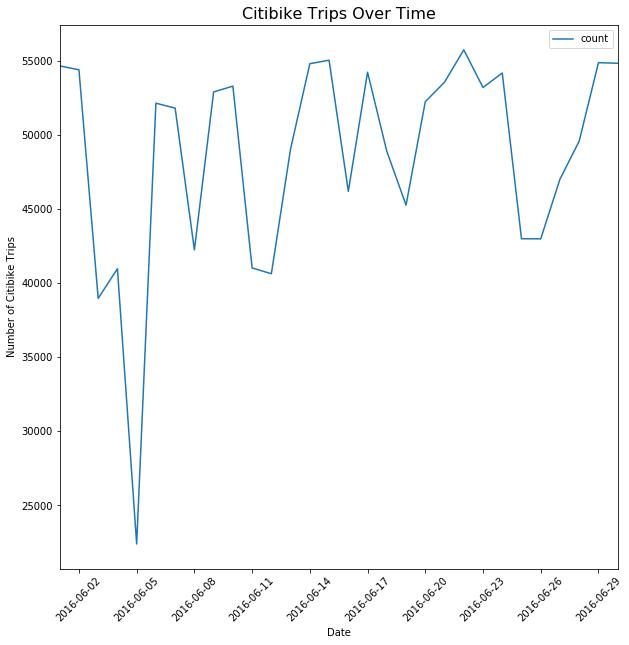

In [16]:
# Plotting overall citibike trips for everyday in June 2016

ax = new.plot(x = 'date_only', y = 'count', figsize = (10,10), rot=45)

pl.title('Citibike Trips Over Time', fontsize=16)
pl.xlabel('Date')
pl.ylabel('Number of Citibike Trips');

Figure 1: Line graph showing Citibike trips per day in June 2016. There was a sharp dip on 5th of June

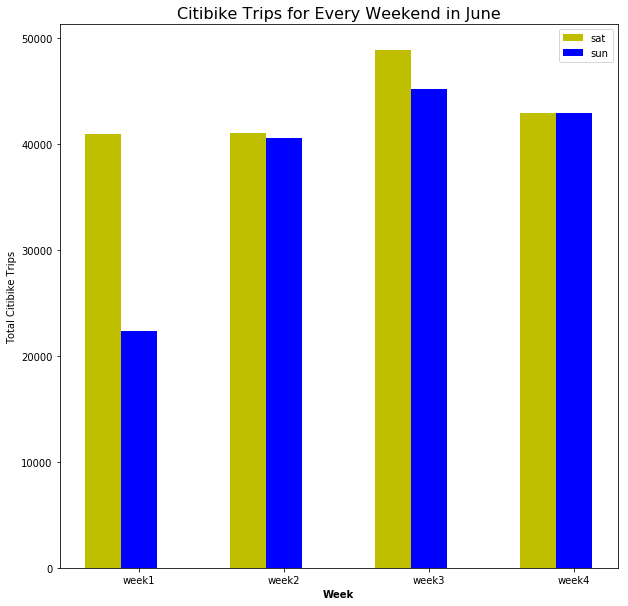

In [17]:
# credits to sam falk for sharing this code with me
# plotting bargraphs of Sat vs Sun in the month of June 2016.

plt.figure(figsize=(10,10))

sat = new_satsun[new_satsun['weekday'] == 5]['count']
sun = new_satsun[new_satsun['weekday'] == 6]['count']

barWidth = 0.25
satwidth = np.arange(len(sat))
sunwidth = [x + barWidth for x in satwidth]

plt.bar(satwidth, sat, color='y', width=barWidth, label='sat')
plt.bar(sunwidth, sun, color='b', width=barWidth, label='sun')

# Add xticks on the middle of the group bars
plt.xlabel('group', fontweight='bold')
plt.xticks([r + barWidth for r in range(len(sat))], ['week1', 'week2', 'week3', 'week4', 'week5'])

plt.title('Citibike Trips for Every Weekend in June', fontsize = 16)
plt.ylabel('Total Citibike Trips')

plt.xlabel('Week')

plt.legend()
plt.show()

Figure 2: Bar graph showing Citibikes trip count every saturday and sunday in June 2016

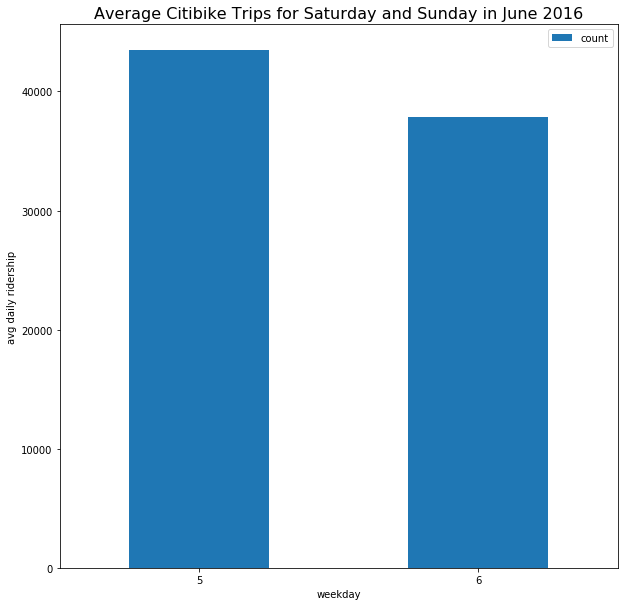

In [18]:
# plotting bar graphs for just sat and sun for June 2016
overall_satsun.plot.bar(x= 'weekday', y ='count' , rot= 0, figsize = (10,10))
plt.ylabel('avg daily ridership')
plt.title('Average Citibike Trips for Saturday and Sunday in June 2016', fontsize = 16);

Figure 3: Bar chart showing the average bike trips in Saturday and Sunday in June 2016.